In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
df = pd.read_pickle('World_vars.pkl')
df.columns

Index(['Country', 'accessibility_to_cities', 'elevation', 'aspect', 'slope',
       'cropland_cover', 'tree_canopy_cover', 'isothermality',
       'rain_coldestQuart', 'rain_driestMonth', 'rain_driestQuart',
       'rain_mean_annual', 'rain_seasonailty', 'rain_warmestQuart',
       'rain_wettestMonth', 'rain_wettestQuart', 'temp_annual_range',
       'temp_coldestQuart', 'temp_diurnal_range', 'temp_driestQuart',
       'temp_max_warmestMonth', 'temp_mean_annual', 'temp_min_coldestMonth',
       'temp_seasonality', 'temp_warmestQuart', 'temp_wettestQuart',
       'sub-region', 'Continent', 'Continent_color', 'Agr_land'],
      dtype='object')

In [5]:
df_rain = df[['Country', 'cropland_cover', 'tree_canopy_cover',
              'rain_mean_annual', 'Continent_color', 'Agr_land']]
df_rain.head()

,Country,cropland_cover,tree_canopy_cover,rain_mean_annual,Continent_color,Agr_land
0,Russia,7.381210,20.356473,434.729235,xkcd:blue,2177218.0
1,United States of America,19.743870,16.728462,671.911733,xkcd:yellow,4058625.0
2,Canada,3.796340,20.587476,453.318423,xkcd:yellow,626562.0
3,Antarctica,0.000000,0.000000,0.000000,xkcd:grey,0.0
4,Indonesia,13.240866,55.478882,2728.355157,xkcd:red,570000.0


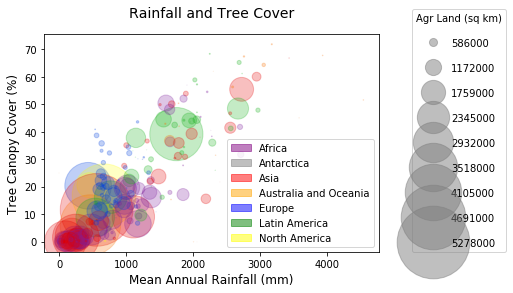

In [16]:
plt.scatter(df_rain['rain_mean_annual'], 
            df_rain['tree_canopy_cover'], 
            s = df_rain['Agr_land'] / 1000,
            c = df_rain['Continent_color'],
            alpha = .25)
plt.xlabel('Mean Annual Rainfall (mm)', fontsize = 12)
plt.ylabel('Tree Canopy Cover (%)', fontsize = 12)
plt.title('Rainfall and Tree Cover', y = 1.05, fontsize = 14)

max_land = df_rain['Agr_land'].max() / 1000
# Convert between plot markersize and scatter s parameters
max_land_ms = np.sqrt(max_land)
h = [plt.plot([], color = 'gray', marker = 'o', ms = i , ls = '', alpha = .5)[0]
    for i in np.linspace(0, max_land_ms, num = 10)[1:]]
leg = plt.legend(handles = h, 
           labels = [int(i) * 1000 for i in np.linspace(0, max_land, num = 10)[1:]],
           loc = (1.1, 0),
           labelspacing = 1.5,
           title = 'Agr Land (sq km)')
ax = plt.gca().add_artist(leg)
purple_patch = mpatches.Patch(color = 'purple', label = 'Africa', alpha = .5)
grey_patch = mpatches.Patch(color = 'grey', label = 'Antarctica', alpha = .5)
red_patch = mpatches.Patch(color = 'red', label = 'Asia', alpha = .5)
orange_patch = mpatches.Patch(color = 'orange', label = 'Australia and Oceania', alpha = .5)
blue_patch = mpatches.Patch(color = 'blue', label = 'Europe', alpha = .5)
green_patch = mpatches.Patch(color = 'green', label = 'Latin America', alpha = .5)
yellow_patch = mpatches.Patch(color = 'yellow', label = 'North America', alpha = .5)
plt.legend(handles=[purple_patch, grey_patch, red_patch, orange_patch,
                   blue_patch, green_patch, yellow_patch],
           loc = 4,
           ncol = 1)
plt.savefig('Rain_tree_cover.png', bbox_inches = 'tight')
plt.show()

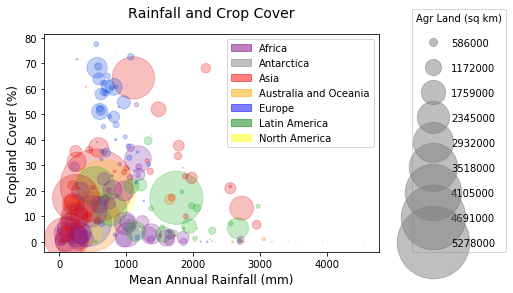

In [17]:
plt.scatter(df_rain['rain_mean_annual'], 
            df_rain['cropland_cover'], 
            s = df_rain['Agr_land'] / 1000,
            c = df_rain['Continent_color'],
            alpha = .25)
plt.xlabel('Mean Annual Rainfall (mm)', fontsize = 12)
plt.ylabel('Cropland Cover (%)', fontsize = 12)
plt.title('Rainfall and Crop Cover', y = 1.05, fontsize = 14)

max_land = df_rain['Agr_land'].max() / 1000
# Convert between plot markersize and scatter s parameters
max_land_ms = np.sqrt(max_land)
h = [plt.plot([], color = 'gray', marker = 'o', ms = i , ls = '', alpha = .5)[0]
    for i in np.linspace(0, max_land_ms, num = 10)[1:]]
leg = plt.legend(handles = h, 
           labels = [int(i) * 1000 for i in np.linspace(0, max_land, num = 10)[1:]],
           loc = (1.1, 0),
           labelspacing = 1.5,
           title = 'Agr Land (sq km)')
ax = plt.gca().add_artist(leg)
# purple_patch = mpatches.Patch(color = 'purple', label = 'Africa', alpha = .5)
# grey_patch = mpatches.Patch(color = 'grey', label = 'Antarctica', alpha = .5)
# red_patch = mpatches.Patch(color = 'red', label = 'Asia', alpha = .5)
# orange_patch = mpatches.Patch(color = 'orange', label = 'Australia and Oceania', alpha = .5)
# blue_patch = mpatches.Patch(color = 'blue', label = 'Europe', alpha = .5)
# green_patch = mpatches.Patch(color = 'green', label = 'Latin America', alpha = .5)
# yellow_patch = mpatches.Patch(color = 'yellow', label = 'North America', alpha = .5)
plt.legend(handles=[purple_patch, grey_patch, red_patch, orange_patch,
                   blue_patch, green_patch, yellow_patch],
           loc = 1,
           ncol = 1)
plt.savefig('Rain_crop_cover.png', bbox_inches = 'tight')
plt.show()